# Entanglement Swapping

Implementation of Alice Bob Charlie example, qubits: $A$ $B$ $C_1$ $C_2$

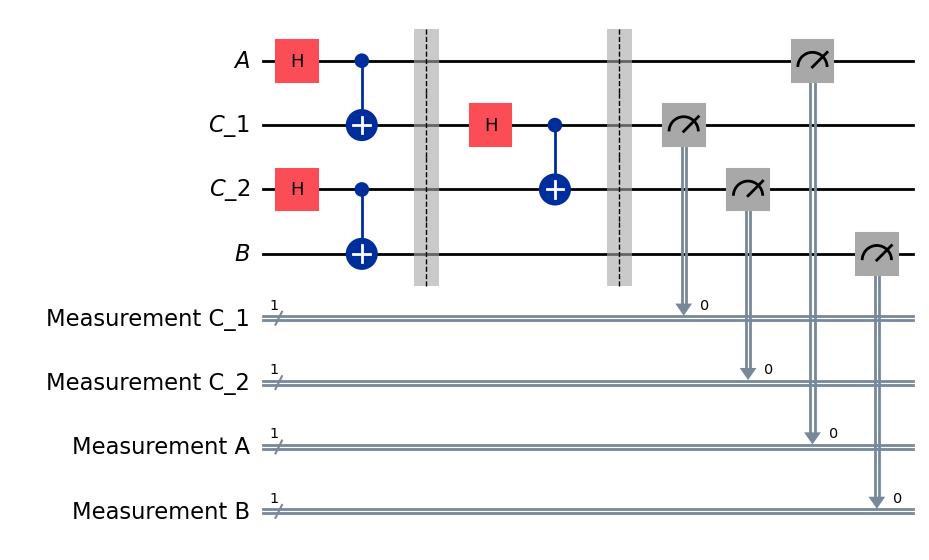

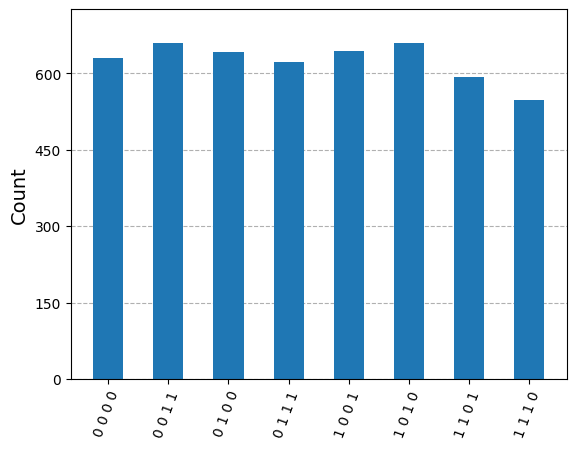

In [60]:
import qiskit as qk
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import XGate


qr_A = QuantumRegister(1, name='A')
qr_C1 = QuantumRegister(1, name='C_1')
qr_B = QuantumRegister(1, name='B')
qr_C2 = QuantumRegister(1, name='C_2')
cr_C1 = ClassicalRegister(1,name='Measurement C_1')
cr_C2 = ClassicalRegister(1,name='Measurement C_2')
cr_A = ClassicalRegister(1,name='Measurement A')
cr_B = ClassicalRegister(1,name='Measurement B')

# Create QuantumCircuit
qc = qk.QuantumCircuit(qr_A, qr_C1,  qr_C2, qr_B, cr_C1, cr_C2, cr_A, cr_B, name='EntanglementSwapping')

# Preparação qubits
qc.h(0)
qc.append(XGate().control(1), [0,1]) # [controlcubits,targetcubits]
qc.h(2)
qc.append(XGate().control(1), [2,3]) # [controlcubits,targetcubits]
qc.barrier()


# https://quantumcomputing.stackexchange.com/questions/10115/how-to-measure-in-the-bell-basis
# Bell Measurement
qc.h(1)
qc.append(XGate().control(1), [1,2]) # [controlcubits,targetcubits]
qc.barrier()

# Measurement
qc.measure(1,0)
qc.measure(2,1)
qc.measure(0,2)
qc.measure(3,3)

display(qc.draw('mpl'))


# Simulação
import qiskit_aer
from qiskit.visualization import plot_histogram


backend = qiskit_aer.Aer.get_backend('qasm_simulator')
program_ = qk.transpile(qc, backend)
job = backend.run(program_, shots=samples)


result = job.result()
counts = result.get_counts()


plot_histogram(counts, bar_labels=False) # eixo X ta |C_1 C_2 A B >
